In [2]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math
from sklearn.datasets import load_wine
from torch import nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
class Loaddataset(object):

    def __init__(self):

        data = load_wine()

        self.X=torch.tensor(data['data'],dtype=torch.float32)

        scaler = StandardScaler()

        self.X = scaler.fit_transform(self.X)

        self.y=torch.tensor(data['target'],dtype=torch.int)

        self.y=self.y

        self.n_samples =self.X.shape[0]
    
    def dataset (self):

        return self.X, self.y
    
    def __len__(self):

        return self.n_samples
    
    def __getitem__(self, index):

        return self.X[index], self.y[index]

In [5]:
dataset = Loaddataset()

In [6]:

pca = PCA(n_components=2).fit(dataset.X)

transformed_x=pca.transform(dataset.X)

transformed_x = torch.tensor(transformed_x, dtype=torch.float32)

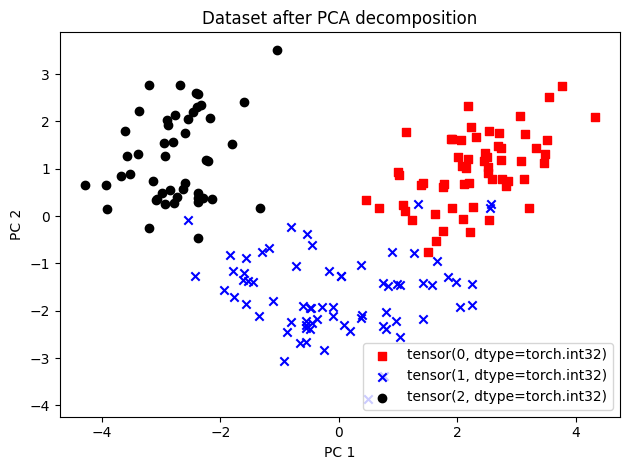

In [8]:
colors = ['r', 'b', 'black']
markers = ['s', 'x', 'o']
for l, c, m in zip(torch.unique(dataset.y), colors, markers):
     plt.scatter(transformed_x[dataset.y==l, 0],
                 transformed_x[dataset.y==l, 1] * (-1),
                 c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower right')
plt.title("Dataset after PCA decomposition")
plt.tight_layout()

In [9]:
def comp_accuracy(true_labels, pred_labels):
    accuracy = torch.sum(true_labels.view(-1).float() == 
                         pred_labels.float()).item() / true_labels.size(0)
    return accuracy

In [10]:
model_transformed =nn.Sequential(nn.Linear(2,3),nn.Softmax())

loss_fn = nn.CrossEntropyLoss()

optimiser = torch.optim.SGD(model_transformed.parameters(), lr=0.1,momentum=0.9)

In [11]:
epochs = 300

for epoch in range(epochs):


    output = model_transformed(transformed_x)

    loss = loss_fn(output, dataset.y.long())

    optimiser.zero_grad()

    loss.backward()

    optimiser.step()

    if epoch % 20 ==0:

        acc = comp_accuracy(dataset.y,torch.argmax(model_transformed(transformed_x), dim=1))

        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Train accuracy: {acc *100:.2f}%")

Epoch: 0 | Loss: 1.15043, Train accuracy: 33.15%
Epoch: 20 | Loss: 0.64733, Train accuracy: 94.38%
Epoch: 40 | Loss: 0.60051, Train accuracy: 97.19%
Epoch: 60 | Loss: 0.59696, Train accuracy: 97.19%
Epoch: 80 | Loss: 0.59510, Train accuracy: 97.19%
Epoch: 100 | Loss: 0.59387, Train accuracy: 97.19%
Epoch: 120 | Loss: 0.59291, Train accuracy: 97.19%
Epoch: 140 | Loss: 0.59212, Train accuracy: 97.19%
Epoch: 160 | Loss: 0.59145, Train accuracy: 97.19%
Epoch: 180 | Loss: 0.59086, Train accuracy: 97.19%
Epoch: 200 | Loss: 0.59035, Train accuracy: 97.19%
Epoch: 220 | Loss: 0.58989, Train accuracy: 97.19%
Epoch: 240 | Loss: 0.58948, Train accuracy: 97.19%
Epoch: 260 | Loss: 0.58911, Train accuracy: 97.19%
Epoch: 280 | Loss: 0.58877, Train accuracy: 97.19%


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
